# Textura - Método LBP
Implementación del extractor de características LBP. Prueba y resultados sobre set de imágenes

In [1]:
# Librerías principales
import numpy as np
import cv2 as cv
import matplotlib
from matplotlib import pyplot as plt

# Tratamiento de archivos
import glob

# Tipo de visualización
%matplotlib inline

# Versiones de librerías
print("".join(f"{x[0]}: {x[1]}\n" for x in [
    ("Numpy",np.__version__),
    ("openCV",cv.__version__),
    ("Matplotlib",matplotlib.__version__),
]))

Numpy: 1.22.3
openCV: 4.5.5
Matplotlib: 3.5.1



In [2]:
# Definición de la ruta para levantar las imagenes
IMG_DIR = '.\images'
IMG_NAME = 'imagen5.png'

## Funciones auxiliares
Función para cargar y guardar en una lista todas las imágenes

In [3]:
def load_images(img_fnames):
    images = []
    for fname in img_fnames:
        image = cv.imread(fname)
        # Conversión a RGB para abrir con plt
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        images.append(image)
    
    print(f'Se cargaron {len(images)} imágenes'.format(len(images)))
    return images

## Algoritmo LBP
Se desarrolla la función para llevar a cabo el proceso de _textura_ en las imágenes mediante el algoritmo LBP.

In [4]:
def lbp(image_input, LBP_size=3):
    ''' 
    Función que devuelve que recorre la imagen con un kernel tal que aplica el método LBP de texturas.
    image_input: imagen de entrada a color.
    LBP_size: dimensión del kernel. Por defecto es igual a 3.
    '''
    # Conversión de la imagen de entrada a escala de grises
    img_gray = cv.cvtColor(image_input, cv.COLOR_RGB2GRAY)
    # Matriz de ceros que tomará los valores del procesamiento
    imgLBP = np.zeros_like(img_gray)
    # Tamaño del kernel
    LBP_size = 3

    # Procesamiento
    for h in range(0, img_gray.shape[0]-LBP_size):
        for w in range(0, img_gray.shape[1]-LBP_size):
            # Ubicación del kernel en la imagen a procesar
            K_lbp = img_gray[h:h+LBP_size,w:w+LBP_size]
            # Pixel central del solapamiento entre kernel e imagen
            center = K_lbp[1,1]
            # Conversión en 1 y 0 según condición LBP
            K_lbp01 = (K_lbp >= center)*1
            # Recorrido de píxeles alrededor del centro según método LBP
            a = K_lbp01[0,0:3]
            b = K_lbp01[1:3,2]
            c = K_lbp01[2,0:2][::-1]
            d = K_lbp01[1,0]
            # Vector con el valor de píxeles luego del recorrido
            K_lbp01_vector  = np.concatenate((a, b, c ,d), axis=None)
            # Indice de elementos del vector distintos de 0
            idx_1_K_lbp01 = np.where(K_lbp01_vector)[0]
            # Conversión del número binario representado por el vector a decimal
            if len(idx_1_K_lbp01) >= 1:
                num = np.sum(2**idx_1_K_lbp01)
            else:
                num = 0

            imgLBP[h+1,w+1] = num

    return imgLBP


## Procesamiento de imágenes
Se levantan las imágenes que se emplearán para efectuar la transformación LBP. Se le aplica la función _lbp_ y se guardan las imágenes procesadas en una nueva lista para graficar y realizar los histogramas.


In [5]:
# Carga de imágenes
img_fnames = glob.glob(IMG_DIR + '\*.*')
images = load_images(img_fnames)

Se cargaron 5 imágenes


Se verifican las dimensiones para confirmar que las imágenes poseen 3 canales. La función LBP admito solo imágenes en tres canales.

In [6]:
# Verificación de las dimensiones
for m in range(len(images)):
    print(f'Dimensiones imagen N°:{m+1}', images[m].shape)

Dimensiones imagen N°:1 (189, 190, 3)
Dimensiones imagen N°:2 (188, 188, 3)
Dimensiones imagen N°:3 (189, 196, 3)
Dimensiones imagen N°:4 (189, 188, 3)
Dimensiones imagen N°:5 (190, 191, 3)


In [7]:
# Aplicación de LBP a todo el set de imágenes
images_LBP = []
for image in images:
    image_LBP = lbp(image)
    images_LBP.append(image_LBP)

## Resultados y conclusiones
Las imágenes son disímiles en cuanto a la representación y en algunos casos, incluso en el uso del color. Sin embargo, sorprendemente, presentan entre ellas algunas similitudes al ver los histogramas, como se menciona a continuación:
- Imagen N°2 e imagen N°5: salvo pequeñas diferencias en los máximos de ciertos bins, los histogramas poseen la misma forma.
- Imagen N°3 e imagen N°4: igual a la situación anterior.
- Imagen 1: presenta cierta similitud con las imágenes N°3 y N°4.

Se presentan los resultados 

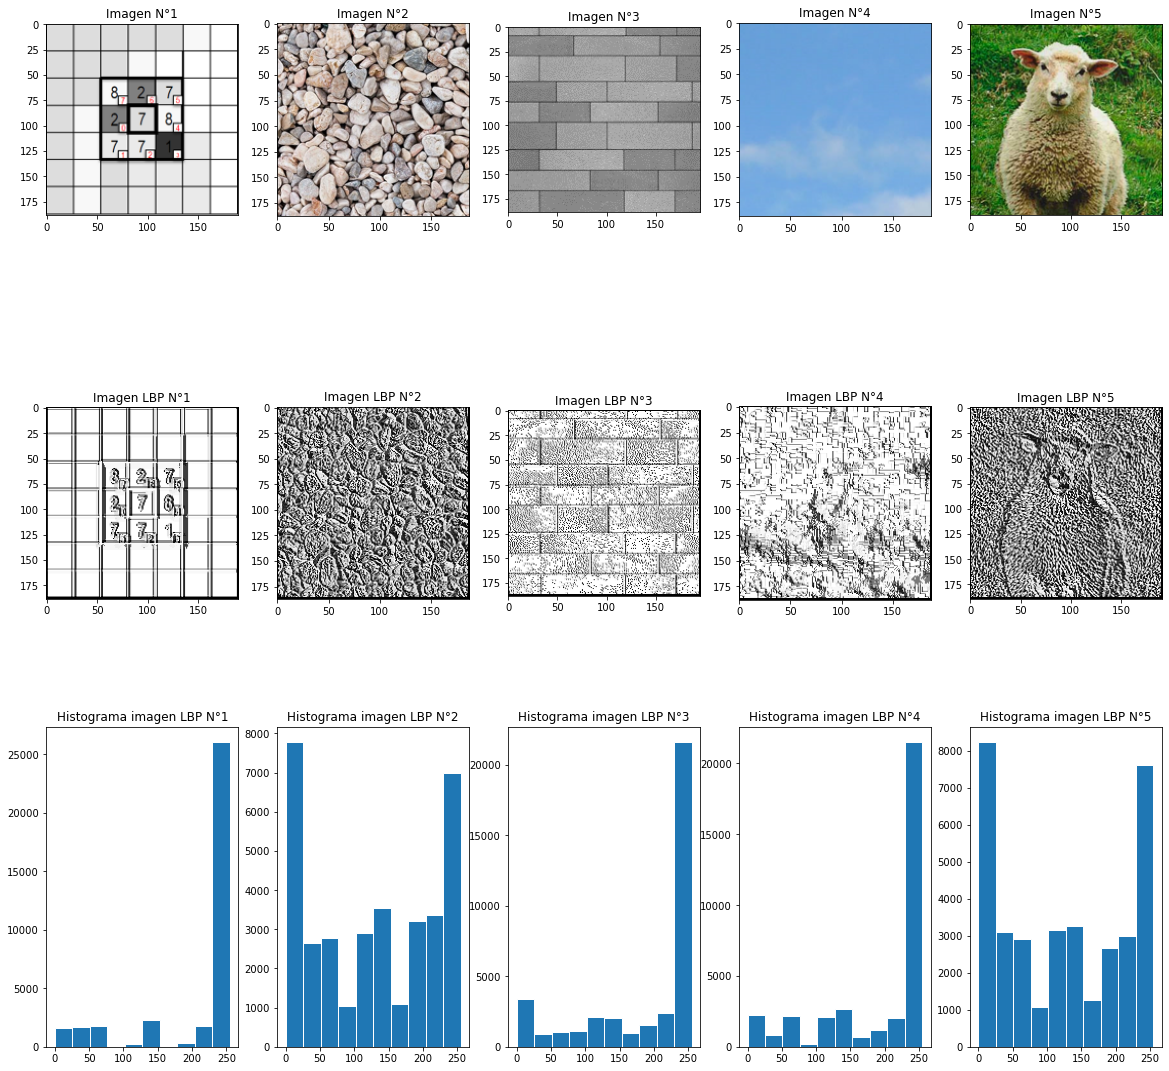

In [8]:
# Definición del subplot
fig, axs = plt.subplots(3, 5, figsize=(20, 20))

# Generación de imágenes e histogramas
for i in range(3):
    for j in range(5):
        if i == 0:
            axs[i, j].imshow(images[j])
            axs[i, j].title.set_text(f'Imagen N°{j+1}')
        elif i == 1:
            axs[i, j].imshow(images_LBP[j], cmap='gray')
            axs[i, j].title.set_text(f'Imagen LBP N°{j+1}')
        else: 
            axs[i,j].hist(images_LBP[j].ravel(), bins=10, range=[0, 255], rwidth=1, edgecolor='white')
            axs[i, j].title.set_text(f'Histograma imagen LBP N°{j+1}')

